In [2]:
pip install wordcloud

  Using cached wordcloud-1.8.1-cp39-cp39-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


### Prince 101916056 3cs10

### Assignment 3

In [3]:
import pandas as pd
import pickle

In [4]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [5]:
data = pd.read_pickle('prince_dtm.pkl')
data = data.transpose()

In [6]:
data

,louis,dave,ricky,Jim-G,bill,Jim-J,john,George,ali,anthony,mike,joe
aaaaah,0,0,0,0,1,0,0,0,0,0,0,0
aaah,0,1,0,0,0,0,0,0,0,0,0,0
aah,3,0,0,0,0,0,0,0,0,0,0,0
abc,0,0,0,0,0,0,0,0,1,0,0,0
abcs,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zombie,0,0,0,0,1,0,0,0,1,0,0,0
zombies,0,0,0,0,1,0,0,0,0,0,0,0
zoning,0,0,0,0,1,0,0,0,0,0,0,0
zoo,0,0,1,0,0,0,0,0,0,0,0,0


In [7]:
top30 = {}
for cols in data.columns:
    top = data[cols].sort_values(ascending=False).head(30)
    top30[cols]= list(zip(top.index, top.values))
top30

{'louis': [('like', 110),
  ('just', 97),
  ('know', 70),
  ('dont', 53),
  ('thats', 51),
  ('im', 50),
  ('youre', 50),
  ('life', 41),
  ('people', 40),
  ('thing', 31),
  ('gonna', 29),
  ('hes', 29),
  ('cause', 28),
  ('theres', 28),
  ('shit', 26),
  ('good', 24),
  ('old', 22),
  ('tit', 22),
  ('time', 22),
  ('theyre', 21),
  ('right', 21),
  ('think', 21),
  ('really', 20),
  ('course', 19),
  ('guy', 18),
  ('murder', 18),
  ('kids', 18),
  ('ok', 17),
  ('fuck', 15),
  ('didnt', 15)],
 'dave': [('like', 103),
  ('know', 79),
  ('ah', 76),
  ('said', 63),
  ('just', 61),
  ('im', 47),
  ('shit', 46),
  ('people', 43),
  ('didnt', 39),
  ('dont', 38),
  ('time', 36),
  ('fuck', 33),
  ('thats', 33),
  ('fucking', 32),
  ('black', 31),
  ('man', 30),
  ('good', 27),
  ('got', 27),
  ('right', 22),
  ('gonna', 21),
  ('oh', 20),
  ('gay', 20),
  ('lot', 20),
  ('yeah', 19),
  ('did', 19),
  ('hes', 19),
  ('oj', 18),
  ('come', 17),
  ('kevin', 16),
  ('guys', 16)],
 'ricky': 

In [8]:
for com, top in top30.items():
  print(com + ':')
  print(', '.join([word for word, count in top[0:29]]))
  print(' ')

louis:
like, just, know, dont, thats, im, youre, life, people, thing, gonna, hes, cause, theres, shit, good, old, tit, time, theyre, right, think, really, course, guy, murder, kids, ok, fuck
 
dave:
like, know, ah, said, just, im, shit, people, didnt, dont, time, fuck, thats, fucking, black, man, good, got, right, gonna, oh, gay, lot, yeah, did, hes, oj, come, kevin
 
ricky:
right, like, im, just, dont, know, said, yeah, fucking, got, say, youre, went, thats, id, people, didnt, little, joke, hes, theyre, ive, thing, going, years, day, theres, saying, hed
 
Jim-G:
like, know, dont, im, right, youre, just, gonna, cause, people, look, thats, theyre, oh, think, wanna, good, didnt, time, did, wife, theres, kids, children, going, men, jim, went, pandemic
 
bill:
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude, fuck, think, want, people, hes, did, guy, didnt, old, make, come, thing, going, theyre, theres
 
Jim-J:
like, im, dont, right, fucking, went, jus

In [9]:
from collections import Counter
cwords = []
for com in data.columns:
    top = [word for (word, count) in top30[com]]
    for t in top:
        cwords.append(t)
print(Counter(cwords).most_common())
stop_wordss = [word for word, count in Counter(cwords).most_common() if count >= 6]

[('like', 12), ('just', 12), ('know', 12), ('dont', 12), ('thats', 12), ('im', 12), ('people', 12), ('right', 12), ('youre', 11), ('got', 10), ('gonna', 9), ('think', 9), ('cause', 7), ('theres', 7), ('time', 7), ('theyre', 7), ('thing', 6), ('hes', 6), ('shit', 6), ('good', 6), ('didnt', 6), ('said', 6), ('oh', 6), ('yeah', 6), ('say', 6), ('going', 6), ('really', 5), ('fucking', 5), ('day', 5), ('fuck', 4), ('did', 4), ('went', 4), ('life', 3), ('old', 3), ('kids', 3), ('lot', 3), ('little', 3), ('ive', 3), ('want', 3), ('make', 3), ('guy', 2), ('ok', 2), ('man', 2), ('come', 2), ('guys', 2), ('id', 2), ('joke', 2), ('wanna', 2), ('wife', 2), ('dude', 2), ('goes', 2), ('women', 2), ('real', 2), ('god', 2), ('gotta', 2), ('tell', 2), ('tit', 1), ('course', 1), ('murder', 1), ('ah', 1), ('black', 1), ('gay', 1), ('oj', 1), ('kevin', 1), ('years', 1), ('saying', 1), ('hed', 1), ('big', 1), ('look', 1), ('children', 1), ('men', 1), ('jim', 1), ('pandemic', 1), ('ill', 1), ('let', 1), ('g

In [12]:
#tokenize and remove stop words+ most common words
df = pd.read_pickle('corpus_prince.pkl')
stop_words = text.ENGLISH_STOP_WORDS.union(stop_wordss)

In [13]:
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(df.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

In [14]:
data_stop.index = df.index
pickle.dump(cv, open("stop_cv.pkl", "wb"))

In [15]:
data_stop.to_pickle("stop_dtm.pkl")

In [16]:
wc = WordCloud(stopwords=stop_words, background_color="white")

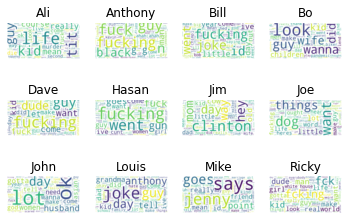

In [17]:
import matplotlib.pyplot as plt
names = ['Ali', 'Anthony', 'Bill', 'Bo', 'Dave', 'Hasan','Jim', 'Joe', 'John', 'Louis', 'Mike', 'Ricky']
for ind, com in enumerate(data.columns):
    wc.generate(df.transcript[com])
    plt.subplot(3, 4, ind+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(names[ind])
    
plt.show()

Assignment 2

In [21]:
#unique words
dp = []
for com in data.columns:
    uniques = data[com].to_numpy().nonzero()[0].size
    dp.append(uniques)

In [22]:
data_words = pd.DataFrame(list(zip(names, dp)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')

In [23]:
data_unique_sort

,comedian,unique_words
9,Louis,1004
0,Ali,1121
5,Hasan,1338
8,John,1356
1,Anthony,1407
6,Jim,1425
11,Ricky,1460
3,Bo,1504
7,Joe,1506
10,Mike,1507


In [24]:
total_words = []
for com in data.columns:
    totals = sum(data[com])
    total_words.append(totals)

In [25]:
data_words['total_words'] = total_words
data_words['run_times'] = [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

In [26]:
data_sort = data_words.sort_values(by='words_per_minute')
data_sort

,comedian,unique_words,total_words,run_times,words_per_minute
9,Louis,1004,2961,60,49.350000
8,John,1356,3364,60,56.066667
0,Ali,1121,3398,60,56.633333
7,Joe,1506,3760,60,62.666667
6,Jim,1425,4097,60,68.283333
1,Anthony,1407,4169,60,69.483333
3,Bo,1504,4344,60,72.400000
11,Ricky,1460,4655,60,77.583333
10,Mike,1507,4809,60,80.150000
5,Hasan,1338,4821,60,80.350000


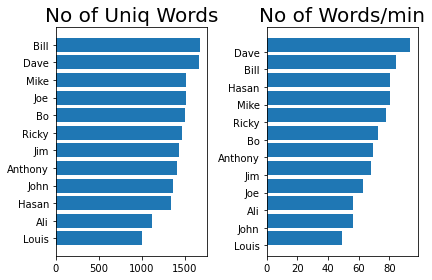

In [31]:
import numpy as np
y_pos = np.arange(len(data_words))
plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)

plt.title('No of Uniq Words', fontsize=20)
plt.subplot(1, 2, 2)
plt.barh(y_pos, data_sort.words_per_minute, align='edge')
plt.yticks(y_pos, data_sort.comedian)

plt.title('No of Words/min', fontsize=20)
plt.tight_layout()
plt.show()

Additional assignment 

In [32]:
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
datas = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1) # Manually combine fucking and fuck as the same word
datas.columns = ['f_word', 's_word']
datas

,f_word,s_word
louis,21,26
dave,65,46
ricky,60,6
Jim-G,0,0
bill,108,64
Jim-J,116,21
john,4,6
George,33,23
ali,16,34
anthony,15,11


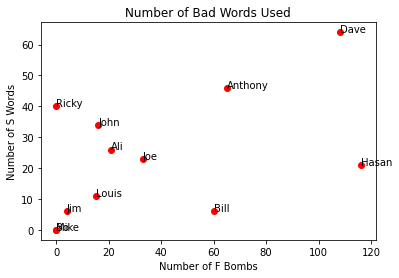

In [33]:
for i, com in enumerate(datas.index):
    x = datas.f_word.loc[com]
    y = datas.s_word.loc[com]
    plt.scatter(x, y, color='red')
    plt.text(x,y,names[i], fontsize=10)
plt.title('Number of Bad Words Used')
plt.xlabel('Number of F Bombs')
plt.ylabel('Number of S Words')

plt.show()